In [1]:
# Get BTC price and volume data from coinmarketcap.com
# Then save data in data_original.csv

import time
import requests
import json
import csv

time_stamp = int(time.time())
print(f"Now timestamp: {time_stamp}")
# 1367107200
request_link = f"https://web-api.coinmarketcap.com/v1/cryptocurrency/ohlcv/historical?convert=USD&slug=bitcoin&time_end={time_stamp}&time_start=1367107200"
print("Request link: " + request_link)
r = requests.get(url = request_link)
#print(r.content)
content = json.loads(r.content)
#print(type(content))
quoteList = content['data']['quotes']
#print(quoteList)

# for windows, newline=''
with open('data_original.csv','w' ,encoding='utf8',newline='') as f:
    csv_write = csv.writer(f)
    csv_head = ["Date","Price","Volume"]
    csv_write.writerow(csv_head)
    
    for quote in quoteList:
        quote_date = quote["time_open"][:10]
        quote_price = "{:.2f}".format(quote["quote"]["USD"]["close"])
        quote_volume = "{:.2f}".format(quote["quote"]["USD"]["volume"])
        csv_write.writerow([quote_date, quote_price, quote_volume])

print("Done")

Now timestamp: 1584514151
Request link: https://web-api.coinmarketcap.com/v1/cryptocurrency/ohlcv/historical?convert=USD&slug=bitcoin&time_end=1584514151&time_start=1367107200
Done


            Date    Price        Volume
0     2013-04-29   144.54  0.000000e+00
1     2013-04-30   139.00  0.000000e+00
2     2013-05-01   116.99  0.000000e+00
3     2013-05-02   105.21  0.000000e+00
4     2013-05-03    97.75  0.000000e+00
...          ...      ...           ...
2510  2020-03-13  5563.71  7.415677e+10
2511  2020-03-14  5200.37  3.615451e+10
2512  2020-03-15  5392.31  3.399789e+10
2513  2020-03-16  5014.48  4.536803e+10
2514  2020-03-17  5225.63  3.862264e+10

[2515 rows x 3 columns]


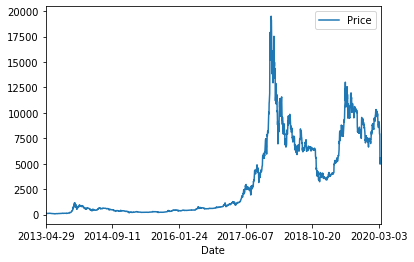

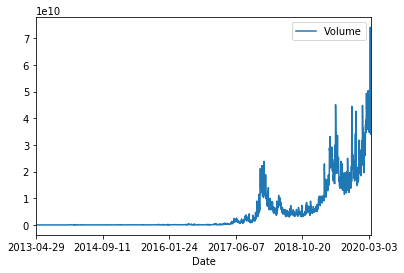

In [10]:
# Read data form data_original.csv
# If you already have data_original.csv and don't need update data, select this cell and click "Cell" > "Run All Below"

import pandas as pd
import matplotlib.pyplot as plt

series = pd.DataFrame()
df = pd.read_csv("data_original.csv")
series['Date'] = df['Date'].tolist()
series['Price'] = df['Price'].tolist()
series['Volume'] = df['Volume'].tolist()
print(series)


ax = plt.gca()
series.plot(kind='line', x='Date', y='Price',ax=ax)
plt.show()

plt.cla()
ax = plt.gca()
series.plot(kind='line', x='Date', y='Volume',ax=ax)
plt.show()

print("Done")

In [11]:
# Label data and save in data_labeled.csv

lable = ["Rise"] * 31 + ["Top"] * 369 + ["Decline"] * 370 + ["Bottom"] * 369 + ["Rise"] * 370 + ["Top"] * 369 + ["Decline"] * 370 + ["Bottom"] * 266
Phase = pd.Series(lable, name = 'Phase')
series = series.join(Phase)
series.to_csv("data_labeled.csv", index = 0)

print("Done")